### **Data Preprocessing**

In [133]:
#importing python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [118]:
#load dataset
data=pd.read_csv('/content/titanic_dataset.csv',index_col='PassengerId') 

In [6]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
data.shape

(891, 11)

In [7]:
data.describe() #describe basics statistics of the data

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


## **Missing value Handling**

In [10]:
data.isnull().sum() #check for null values

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [85]:
data.drop(columns=['Cabin','Name','Ticket'], axis=1,inplace=True) #drop the column that is irrelvent or having less information (most of them are nan values)

In [86]:
data["Embarked"].value_counts() #value count for each category in the data

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [87]:
data["Embarked"].fillna("S", inplace=True)
data["Embarked"].value_counts() #filling the null values with S since most data have S as 'Embarked'

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [120]:
data['Age']=data['Age'].fillna(data['Age'].mode()) #fill nan of age with mode

PassengerId
1      22.0
2      38.0
3      26.0
4      35.0
5      35.0
       ... 
887    27.0
888    19.0
889     NaN
890    26.0
891    32.0
Name: Age, Length: 891, dtype: float64

In [21]:
data.isnull().sum() #after filling nan values checking for null values.
#there is no null values present in the data

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

### **Checking Outliers**

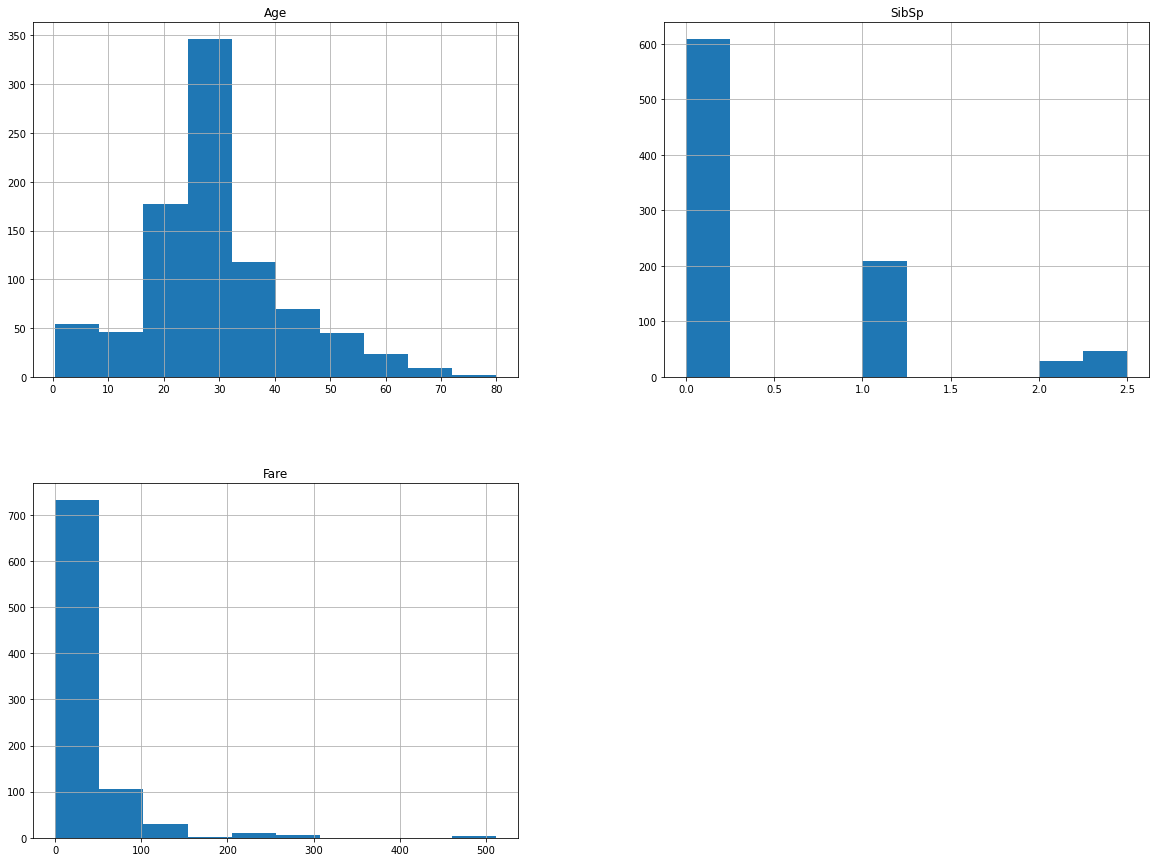

In [43]:
freq_graph=data.select_dtypes(include=['float'])
freq_graph.hist(figsize=(20,15))
plt.show()   # analysing whether mean or median is using while dealing with outliers by looking into measure of central tendency(skewness)

In [66]:
print('skewness value of Age: ',data['Age'].skew())
print('skewness value of Pclass: ',data['Pclass'].skew())
print('skewness value of Fare: ',data['Fare'].skew())
#the skewness value should be within the range of -1 to 1 for a normal distribution, 
#any major changes from this value indicates the presence of extreme value or outlier.


skewness value of Age:  0.4344880940129925
skewness value of Pclass:  -0.6305479068752845
skewness value of Fare:  1.082178592000912


Text(0.5, 1.0, 'Pclass')

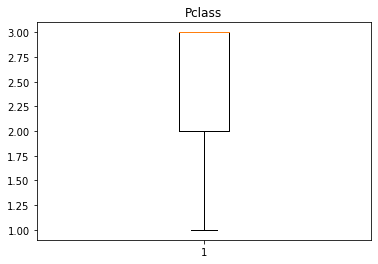

In [32]:
plt.boxplot(data['Pclass'])
plt.title('Pclass') #no outliers present

Text(0.5, 1.0, 'Fare')

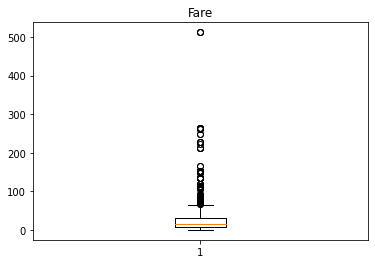

In [111]:
plt.boxplot(data['Fare'])
plt.title('Fare') #outliers are present

In [110]:
Q1=np.percentile(data['Fare'],25,interpolation='midpoint')
Q2=np.percentile(data['Fare'],50,interpolation='midpoint')
Q3=np.percentile(data['Fare'],75,interpolation='midpoint')
#finding quartiles

In [47]:
IQR=Q3-Q1
IQR #inter quartile range

23.0896

In [48]:
low_limit=Q1-1.5*IQR
upp_limt =Q3+1.5*IQR
print(low_limit,upp_limt) #finding upper and lower limit

-26.724 65.6344


In [49]:
outliers=[]
for i in data['Fare']:
  if (i>upp_limt) or (i<low_limit):
    outliers.append(i) 
#checking for values that are less than lower limit and greater than upper limit (ouliers)

In [50]:
outliers

[71.2833,
 263.0,
 146.5208,
 82.1708,
 76.7292,
 80.0,
 83.475,
 73.5,
 263.0,
 77.2875,
 247.5208,
 73.5,
 77.2875,
 79.2,
 66.6,
 69.55,
 69.55,
 146.5208,
 69.55,
 113.275,
 76.2917,
 90.0,
 83.475,
 90.0,
 79.2,
 86.5,
 512.3292,
 79.65,
 153.4625,
 135.6333,
 77.9583,
 78.85,
 91.0792,
 151.55,
 247.5208,
 151.55,
 110.8833,
 108.9,
 83.1583,
 262.375,
 164.8667,
 134.5,
 69.55,
 135.6333,
 153.4625,
 133.65,
 66.6,
 134.5,
 263.0,
 75.25,
 69.3,
 135.6333,
 82.1708,
 211.5,
 227.525,
 73.5,
 120.0,
 113.275,
 90.0,
 120.0,
 263.0,
 81.8583,
 89.1042,
 91.0792,
 90.0,
 78.2667,
 151.55,
 86.5,
 108.9,
 93.5,
 221.7792,
 106.425,
 71.0,
 106.425,
 110.8833,
 227.525,
 79.65,
 110.8833,
 79.65,
 79.2,
 78.2667,
 153.4625,
 77.9583,
 69.3,
 76.7292,
 73.5,
 113.275,
 133.65,
 73.5,
 512.3292,
 76.7292,
 211.3375,
 110.8833,
 227.525,
 151.55,
 227.525,
 211.3375,
 512.3292,
 78.85,
 262.375,
 71.0,
 86.5,
 120.0,
 77.9583,
 211.3375,
 79.2,
 69.55,
 120.0,
 93.5,
 80.0,
 83.1583,
 6

In [51]:
data['Fare']=np.where(data['Fare']>upp_limt,upp_limt,np.where(data['Fare']<low_limit,low_limit,data['Fare']))
#treating outliers by replacing values greater than upper limit by upperlimit value 
#and values greater than lower limit by lower limit value

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


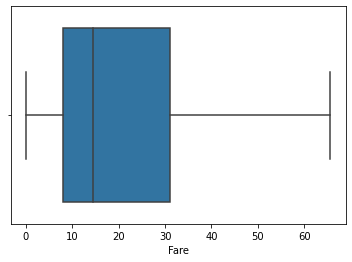

In [52]:
sns.boxplot(data['Fare'],data=data) #no outlier is there

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


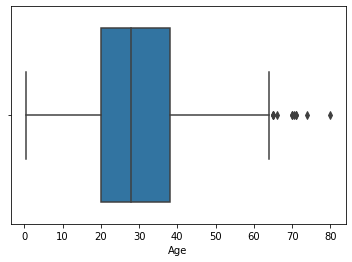

In [128]:
sns.boxplot(data['Age'],data=data) 

In [125]:
IQR=Q3-Q1
IQR

nan

In [126]:
low_limit=Q1-1.5*IQR
upp_limt =Q3+1.5*IQR

In [58]:
print(low_limit,upp_limt)

2.5 54.5


In [59]:
outliers=[]
for i in data['Age']:
  if (i>upp_limt) or (i<low_limit):
    outliers.append(i)

In [60]:
outliers

[2.0,
 58.0,
 55.0,
 2.0,
 66.0,
 65.0,
 0.83,
 59.0,
 71.0,
 70.5,
 2.0,
 55.5,
 1.0,
 61.0,
 1.0,
 56.0,
 1.0,
 58.0,
 2.0,
 59.0,
 62.0,
 58.0,
 63.0,
 65.0,
 2.0,
 0.92,
 61.0,
 2.0,
 60.0,
 1.0,
 1.0,
 64.0,
 65.0,
 56.0,
 0.75,
 2.0,
 63.0,
 58.0,
 55.0,
 71.0,
 2.0,
 64.0,
 62.0,
 62.0,
 60.0,
 61.0,
 57.0,
 80.0,
 2.0,
 0.75,
 56.0,
 58.0,
 70.0,
 60.0,
 60.0,
 70.0,
 0.67,
 57.0,
 1.0,
 0.42,
 2.0,
 1.0,
 62.0,
 0.83,
 74.0,
 56.0]

In [89]:
from sklearn import preprocessing
label_encoder= preprocessing.LabelEncoder() #using label encoder to convert catagorical to numerical one.

In [90]:
data['Sex']=label_encoder.fit_transform(data['Sex'])

In [91]:
data['Embarked']=label_encoder.fit_transform(data['Embarked'])

In [101]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,1,22.0,1,0,7.2500,2
2,1,1,0,38.0,1,0,71.2833,0
3,1,3,0,26.0,0,0,7.9250,2
4,1,1,0,35.0,1,0,53.1000,2
5,0,3,1,35.0,0,0,8.0500,2


In [112]:
x=data.drop('Survived',axis=1)
y=data['Survived'] #taking out of the target variable for performing min_max scale

In [103]:
x1=x.drop(['Sex','Embarked'],axis=1)
x1.head() #droping the transformed column

,Pclass,Age,SibSp,Parch,Fare
PassengerId,,,,,
1,3,22.0,1,0,7.2500
2,1,38.0,1,0,71.2833
3,3,26.0,0,0,7.9250
4,1,35.0,1,0,53.1000
5,3,35.0,0,0,8.0500


In [104]:
min_max_scaler=preprocessing.MinMaxScaler(feature_range=(0,1))
x1=min_max_scaler.fit_transform(x1) #then perform min_max technique

In [105]:
x1=pd.DataFrame(x1,columns=['Pclass','Age','SibSp','Parch','Fare'])

In [106]:
data1=data.copy()

In [108]:
x.drop(['Pclass','Age','SibSp','Parch','Fare'],axis=1,inplace=True)
x.head()

,Sex,Embarked
PassengerId,,
1,1,2
2,0,0
3,0,2
4,0,2
5,1,2


In [109]:
x=pd.concat([x1,x],axis=1)
x.head() #combining both data after scaling

,Pclass,Age,SibSp,Parch,Fare,Sex,Embarked
0,1.0,0.271174,0.125,0.0,0.014151,NaN,NaN
1,0.0,0.472229,0.125,0.0,0.139136,1.0,2.0
2,1.0,0.321438,0.000,0.0,0.015469,0.0,0.0
3,0.0,0.434531,0.125,0.0,0.103644,0.0,2.0
4,1.0,0.434531,0.000,0.0,0.015713,0.0,2.0
